Water tank water level control
=

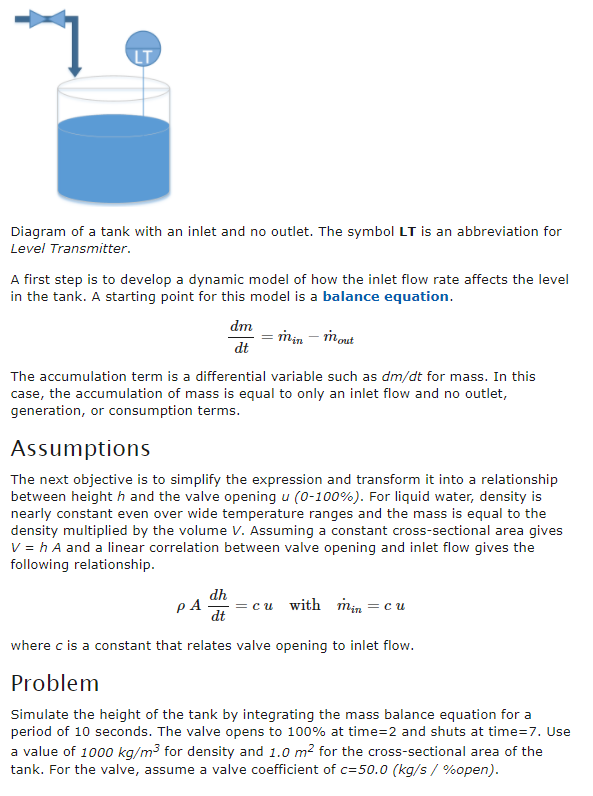

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#define constants
t_strt = 2
t_end = 7
duration = 10
dt = 0.1

In [20]:
# define a function to compute the time rate of change of the water level

def Level_Change(level,t,valve_open):
    c = 50  #valve coeeficient
    A = 1 
    rho = 1000
    return c*valve_open/(rho*A)
    

In [22]:
# time steps
n_t = int(duration/dt) +1

# time duration
t_vector = np.linspace(0,10,n_t)

# valve open percent vector
u = np.zeros(n_t)
u[int(t_strt/dt)+1:int(t_end/dt)] = 100

#initial condition
h_0 = 0

#water level vector
h_t = np.zeros(n_t)


#simulate with ODIENT
for i in range(n_t-1):
    valve = u[i+1]
    y = odeint(Level_Change,h_0,[0,dt],args = (valve,))
    h_0 = y[-1]
    h_t[i+1] = h_0


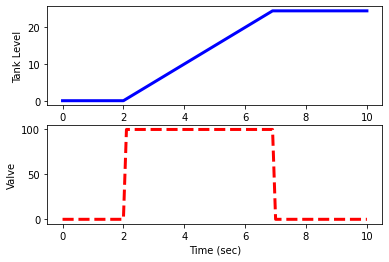

In [24]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t_vector,h_t,'b-',linewidth=3)
plt.ylabel('Tank Level')
plt.subplot(2,1,2)
plt.plot(t_vector,u,'r--',linewidth=3)
plt.ylabel('Valve')    
plt.xlabel('Time (sec)')
plt.show()